## Code set-up: Imports, Packages, Environment variables, and Methods

The software versions used are:

    The Python3 version used for this work is: Python 3.8.x

Before running, please run these commands via pip, in the terminal:

    pip install pandas
    pip install scikit-learn
    pip install scikit-plot
    pip install seaborn
    pip install scipy


In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [56]:
df = pd.read_csv('/Users/deathstar/Documents/data anal/Android_Ransomeware.csv', sep=',')
df.head(5)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [13]:
df.tail()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
392029,2927,10.42.0.151-10.42.0.1-53849-53-17,10.42.0.151,53849,10.42.0.1,53,17,23/08/2017 04:45:14,24707,1,...,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WannaLocker
392030,2928,10.42.0.151-96.126.100.203-34559-123-17,10.42.0.151,34559,96.126.100.203,123,17,23/08/2017 04:43:31,81388,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WannaLocker
392031,2929,10.42.0.151-10.42.0.1-23177-53-17,10.42.0.151,23177,10.42.0.1,53,17,23/08/2017 04:43:38,61591,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WannaLocker
392032,2930,10.42.0.151-10.42.0.1-30407-53-17,10.42.0.151,30407,10.42.0.1,53,17,23/08/2017 04:44:56,24831,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WannaLocker
392033,2931,10.42.0.151-104.192.108.22-60113-443-6,10.42.0.151,60113,104.192.108.22,443,6,23/08/2017 04:55:38,54861885,11,...,32,509513.0,0.0,509513.0,509513.0,54352372.0,0.0,54352372.0,54352372.0,WannaLocker


In [17]:
# Show all 86 columns
with pd.option_context(
                       'display.max_columns', None,
                       ):
    display(df.head())

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,8,1076.0,4575.0,821.0,0.0,179.333333,321.621931,1418.0,0.0,571.875000,679.532284,37410.462484,92.682087,11619.538462,14541.155884,49105.0,24.0,101887.0,20377.4,12821.550737,30425.0,111.0,128516.0,18359.428571,24038.557859,54822.0,24.0,0,0,0,0,200,264,39.720895,52.961193,0.0,1418.0,376.733333,562.514948,316423.066667,0,0,0,1,0,0,0,0,1.0,403.642857,179.333333,571.875000,200,0,0,0,0,0,0,6,1076,8,4575,65535,353,3,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,0,23.0,0.0,23.0,0.0,11.500000,16.263456,0.0,0.0,0.000000,0.000000,65902.578797,5730.659026,349.000000,0.000000,349.0,349.0,349.0,349.0,0.000000,349.0,349.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,64,0,5730.659026,0.000000,0.0,23.0,15.333333,13.279056,176.333333,0,1,0,0,1,0,0,0,0.0,23.000000,11.500000,0.000000,64,0,0,0,0,0,0,2,23,0,0,1594,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,0,23.0,0.0,23.0,0.0,11.500000,16.263456,0.0,0.0,0.000000,0.000000,193277.310924,16806.722689,119.000000,0.000000,119.0,119.0,119.0,119.0,0.000000,119.0,119.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,64,0,16806.722689,0.000000,0.0,23.0,15.333333,13.279056,176.333333,0,1,0,0,1,0,0,0,0.0,23.000000,11.500000,0.000000,64,0,0,0,0,0,0,2,23,0,0,1486,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,1,31.0,0.0,31.0,31.0,31.000000,0.000000,0.0,0.0,0.000000,0.000000,836.594252,53.973823,37055.000000,0.000000,37055.0,37055.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,32,32,26.986911,26.986911,0.0,31.0,20.666667,17.897858,320.333333,0,1,0,0,1,0,0,0,1.0,31.000000,31.000000,0.000000,32,0,0,0,0,0,0,1,31,1,0,1548,391,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,7,1313.0,307.0,753.0,0.0,218.833333,331.306152,168.0,0.0,43.857143,75.366722,9064.103353,72.736632,14893.916667,18532.640750,62243.0,55.0,125550.0,25110.0,28468.232023,70464.0,172.0,156011.0,26001.833333,24955.901822,67743.0,55.0,0,0,0,0,200,232,33.570753,39.165879,0.0,753.0,115.714286,231.422833,53556.527473,0,0,0,1,0,0,0,0,1.0,124.615385,218.833333,43.857143,200,0,0,0,0,0,0,6,1313,7,307,65535,352,3,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


### Print basic information about dataset

Information about columns, number of non-null values in each column, their data type, and memory usage
We can see that we dont have missing data;

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392034 entries, 0 to 392033
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    392034 non-null  int64  
 1   Flow ID                       392034 non-null  object 
 2    Source IP                    392034 non-null  object 
 3    Source Port                  392034 non-null  int64  
 4    Destination IP               392034 non-null  object 
 5    Destination Port             392034 non-null  int64  
 6    Protocol                     392034 non-null  int64  
 7    Timestamp                    392034 non-null  object 
 8    Flow Duration                392034 non-null  int64  
 9    Total Fwd Packets            392034 non-null  int64  
 10   Total Backward Packets       392034 non-null  int64  
 11  Total Length of Fwd Packets   392034 non-null  float64
 12   Total Length of Bwd Packets  392034 non-nul

In [64]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Columns: {}'.format(df.shape[1]))

Number of Rows: 392034
Number of Columns: 86


In [21]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

`.nunique(axis=0)` returns the number of unique values for each variable.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

The code that follows this simply formats each row to the regular format and suppresses scientific notation

In [38]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,...,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000,392034.000000
mean,1872.127117,38701.627680,5941.135162,8.373332,10676839.669001,7.078121,8.711813,884.441186,8354.891119,233.357069,...,1.737467,-11083.656303,193019.215799,28391.322196,222787.912781,168934.140131,4635357.485108,351322.773821,4941647.579792,4363740.470898
std,1441.683435,18606.610073,15319.609286,4.602725,21972620.106032,33.434495,80.949869,16621.894218,109925.343984,572.469765,...,14.554286,3937014.862725,1167351.107424,491253.729161,1483669.155620,1044800.873704,15119368.413285,3025003.650273,15862007.272826,14769138.567671
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1395062237.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,626.000000,34088.000000,80.000000,6.000000,44027.250000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1637.000000,43469.000000,443.000000,6.000000,515256.000000,2.000000,1.000000,31.000000,31.000000,31.000000,...,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2828.000000,52490.000000,443.000000,6.000000,10597701.500000,5.000000,4.000000,448.000000,383.000000,333.000000,...,1.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8698.000000,65534.000000,65487.000000,17.000000,119999733.000000,3632.000000,12820.000000,4309688.000000,18518967.000000,20272.000000,...,3211.000000,170524927.000000,107496032.000000,52436126.319963,107496032.000000,107496032.000000,119886447.000000,75983226.196533,119886447.000000,119886447.000000


# Cleaning dataset

Rename columns

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [60]:
df.columns = df.columns.str.replace('unnamed:_0', 'id')

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.head()

,id,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [66]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['id', 'flow_id', 'source_ip', 'source_port', 'destination_ip',
       'destination_port', 'protocol', 'timestamp', 'flow_duration',
       'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s',
       'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std',
       'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', '

# Get more information about the data

#### Print TOP-20 for <br> 
- srcIP
- dstIP
- dstPort
- proto
- flow_duration
- label

In [90]:
top_20_srcIP = df.source_ip.value_counts().head(20)
top_20_dstIP = df.destination_ip.value_counts().head(20)
top_20_dstPort = df.destination_port.value_counts().head(20)
top_20_proto = df.protocol.value_counts().head(20)
top_20_flow_dur = df.flow_duration.value_counts().head(20)
top_20_labels = df.label.value_counts().head(20)


print(f'TOP 20 Source IPs: ')
print(top_20_srcIP)
print()
print(f'TOP 20 Destination IPs: ')
print(top_20_dstIP)
print()
print(f'TOP 20 Destination Ports:  ')
print(top_20_dstPort)
print()
print(f'TOP 20 Protocols: ')
print(top_20_proto)
print()
print(f'TOP 20 Flow Duration: ')
print(top_20_flow_dur)
print()
print(f'TOP 20 Labels: ')
print(top_20_labels)

TOP 20 Source IPs: 
10.42.0.211        177977
10.42.0.151        115388
10.42.0.42          48812
10.42.0.1            3126
8.6.0.1              2511
202.77.129.150        923
64.71.142.124         923
104.192.108.22        830
172.217.1.174         435
104.193.88.109        413
180.149.138.210       391
192.229.173.173       368
64.71.142.125         326
119.146.74.34         322
119.146.74.33         318
123.125.29.138        314
180.163.255.159       314
222.73.28.96          270
157.240.2.20          246
66.198.24.243         241
Name: source_ip, dtype: int64

TOP 20 Destination IPs: 
10.42.0.1          73665
10.42.0.211        21878
10.42.0.151        14023
10.42.0.42          8354
192.229.173.173     4258
46.166.184.102      4255
104.192.108.22      3730
106.39.169.66       3503
64.71.142.124       3204
180.149.136.194     2955
123.125.29.220      2777
239.255.255.250     2620
119.146.74.33       2544
149.56.126.237      2521
8.0.6.4             2511
202.77.129.150      2463
222.

In [114]:
filter_port_zero = df[df['destination_port'] != 0]
filter_port_zero.destination_port.value_counts().head(20)

443      169954
80        88984
53        73540
1900       2620
5228       1175
5222       1023
123        1010
5353        940
5351        724
40024       496
40015       433
12350       380
8610        316
8612        316
40010       225
9001        203
67          180
40022       177
40019       172
40008       171
Name: destination_port, dtype: int64

TOP 20 Destination Ports:  
443      169954
80        88984
53        73540
0          2733
1900       2620
5228       1175
5222       1023
123        1010
5353        940
5351        724
40024       496
40015       433
12350       380
8610        316
8612        316
40010       225
9001        203
67          180
40022       177
40019       172

In [110]:
most_used_ports = [1900, 80,443,5228,5222, 123, 5353 ,5351, 9001]
df[df["destination_port"].isin(most_used_ports)].head(10)[['source_ip','destination_ip','flow_duration','label']]

,source_ip,destination_ip,flow_duration,label
0,10.42.0.211,172.217.2.174,151054,Benign
1,10.42.0.211,172.217.2.174,349,Benign
2,10.42.0.211,172.217.12.174,119,Benign
3,10.42.0.211,172.217.10.74,37055,Benign
4,10.42.0.211,172.217.2.174,178727,Benign
5,10.42.0.211,172.217.2.174,143,Benign
6,10.42.0.211,31.13.71.3,35978,Benign
7,10.42.0.211,31.13.65.1,507298,Benign
8,10.42.0.211,31.13.65.1,2041284,Benign
9,10.42.0.211,172.217.7.1,37591,Benign


Text(0, 0.5, 'Dest IP')

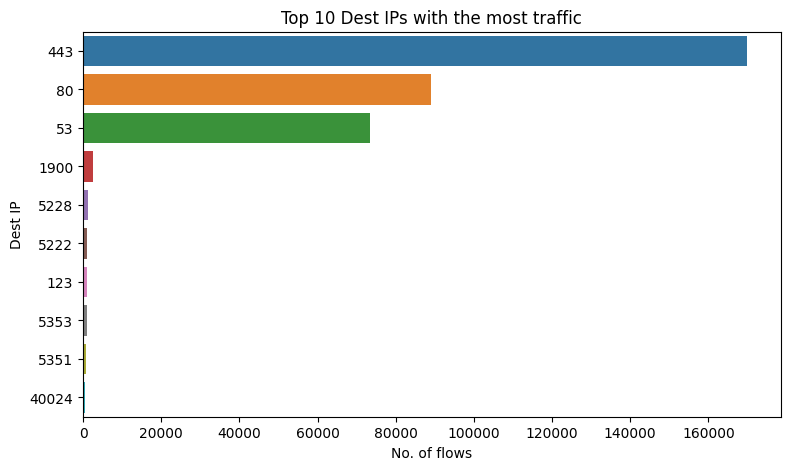

In [115]:
top_10_destPorts = filter_port_zero['destination_port'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='destination_port', order=top_10_destPorts)
plt.title('Top 10 Dest IPs with the most traffic')
plt.xlabel('No. of flows')
plt.ylabel('Dest IP')

### Split df to ransomware and bening dfs

In [116]:
print(f"Benign: {len(df[df.label == 'Benign'])}")
print(f"Malicious: {len(df[df.label != 'Benign'])}")

Benign: 43091
Malicious: 348943


In [118]:
ransomware_df = df[df.label != 'Benign']

In [119]:
ransomware_df.shape

(348943, 86)

In [120]:
ransomware_df.head()

,id,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
43091,0,157.240.18.10-10.42.0.211-443-48478-6,10.42.0.211,48478,157.240.18.10,443,6,28/08/2017 02:19:52,54295,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charger
43092,1,10.42.0.211-31.13.71.1-42881-443-6,10.42.0.211,42881,31.13.71.1,443,6,28/08/2017 02:19:52,216598,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charger
43093,2,10.42.0.211-31.13.71.1-42881-443-6,10.42.0.211,42881,31.13.71.1,443,6,28/08/2017 02:19:53,922042,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charger
43094,3,10.42.0.211-31.13.71.1-42881-443-6,10.42.0.211,42881,31.13.71.1,443,6,28/08/2017 02:19:55,3679063,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charger
43095,4,180.149.138.197-10.42.0.211-80-37257-6,10.42.0.211,37257,180.149.138.197,80,6,28/08/2017 02:20:10,502269,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charger


In [121]:
bening_df = df[df.label == 'Benign']

In [123]:
bening_df.shape

(43091, 86)

In [122]:
bening_df.head()


,id,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


We have 10 ransomware variants in dataset.

!!! Maybe its a good idea to look at each one of them ???? 

In [125]:
ransomware_df.label.value_counts()

SVpeng         54161
PornDroid      46082
Koler          44555
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: label, dtype: int64

In [141]:
ransomware_df.destination_port.value_counts().head(30)

443      151535
80        78533
53        65549
0          2364
1900       2329
5228       1062
123        1007
5353        888
5222        861
5351        700
40024       490
40015       429
12350       362
8612        316
8610        316
40010       219
9001        203
67          180
40022       171
40008       169
40027       166
40019       155
40035       150
40033       140
16100        80
8080         75
68           59
16200        53
40001        38
40004        35
Name: destination_port, dtype: int64

In [146]:
malware_on_dest_port_1900 = ransomware_df[(ransomware_df.destination_port == 1900)]

In [148]:
malware_on_dest_port_1900.label.value_counts().head()

Jisut        409
Koler        409
Lockerpin    388
PornDroid    362
Charger      348
Name: label, dtype: int64

### Top 10 dest IPs by SVpeng ransomware family

In [126]:
SVpeng_df = df[df.label == 'SVpeng']

In [128]:
SVpeng_df.destination_ip.value_counts().head(10)

10.42.0.1          10244
10.42.0.42          6832
217.182.174.92      1300
119.146.74.33        535
192.229.173.173      520
104.192.108.22       486
198.54.117.212       475
106.39.169.66        419
123.125.29.220       388
185.82.218.12        347
Name: destination_ip, dtype: int64

### Top 10 dest IPs by PornDroid ransomware family

In [131]:
PornDroid_df = df[df.label == 'PornDroid']
PornDroid_df.destination_ip.value_counts().head(10)


10.42.0.1          8903
10.42.0.211        4693
46.166.184.102     2485
106.39.169.66       613
180.149.136.194     612
104.192.108.22      584
123.125.29.220      516
192.229.173.173     446
222.73.28.96        399
239.255.255.250     362
Name: destination_ip, dtype: int64

### Top 10 dest IPs by Koler ransomware family

In [133]:
Koler_df = df[df.label == 'Koler']
Koler_df.destination_ip.value_counts().head(10)

10.42.0.1          7420
10.42.0.211        4432
149.56.126.237     2521
46.166.184.102     1770
37.1.209.189        620
64.71.142.124       610
192.229.173.173     527
104.192.108.22      481
106.39.169.66       454
239.255.255.250     409
Name: destination_ip, dtype: int64

### Finding the correlation matrix


In [137]:
categorical_features = df.select_dtypes(include=[object])

categorical_features.columns

Index(['flow_id', 'source_ip', 'destination_ip', 'timestamp', 'label'], dtype='object')

In [136]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['id', 'source_port', 'destination_port', 'protocol', 'flow_duration',
       'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s',
       'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std',
       'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin

In [135]:
correlation_matrix = numeric_features.corr()
correlation_matrix.head()

,id,source_port,destination_port,protocol,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
id,1.000000,-0.118322,0.024708,0.390513,-0.155212,-0.076718,-0.046200,-0.030307,-0.036911,-0.137813,...,-0.048407,-0.002998,-0.037006,-0.026689,-0.038786,-0.030556,-0.048262,-0.040066,-0.052857,-0.042973
source_port,-0.118322,1.000000,-0.677404,-0.106988,0.075668,0.059522,0.039967,0.010522,0.032650,0.145099,...,0.020120,-0.000300,0.032367,-0.011172,0.019720,0.043655,0.055167,-0.004697,0.050892,0.058162
destination_port,0.024708,-0.677404,1.000000,-0.138219,-0.112308,-0.037814,-0.026093,0.011287,-0.024394,-0.105116,...,-0.002475,0.001035,-0.027540,0.006399,-0.018666,-0.033561,-0.064478,-0.020714,-0.064413,-0.062914
protocol,0.390513,-0.106988,-0.138219,1.000000,-0.225120,-0.074899,-0.044811,-0.018148,-0.035984,-0.138044,...,-0.016181,-0.005289,-0.056563,0.000126,-0.042661,-0.066550,-0.147419,-0.054831,-0.148693,-0.142687
flow_duration,-0.155212,0.075668,-0.112308,-0.225120,1.000000,0.188881,0.103382,0.094809,0.072813,0.216056,...,0.184134,-0.004152,0.337923,0.219859,0.346697,0.286768,0.767063,0.400345,0.799740,0.720739


[]

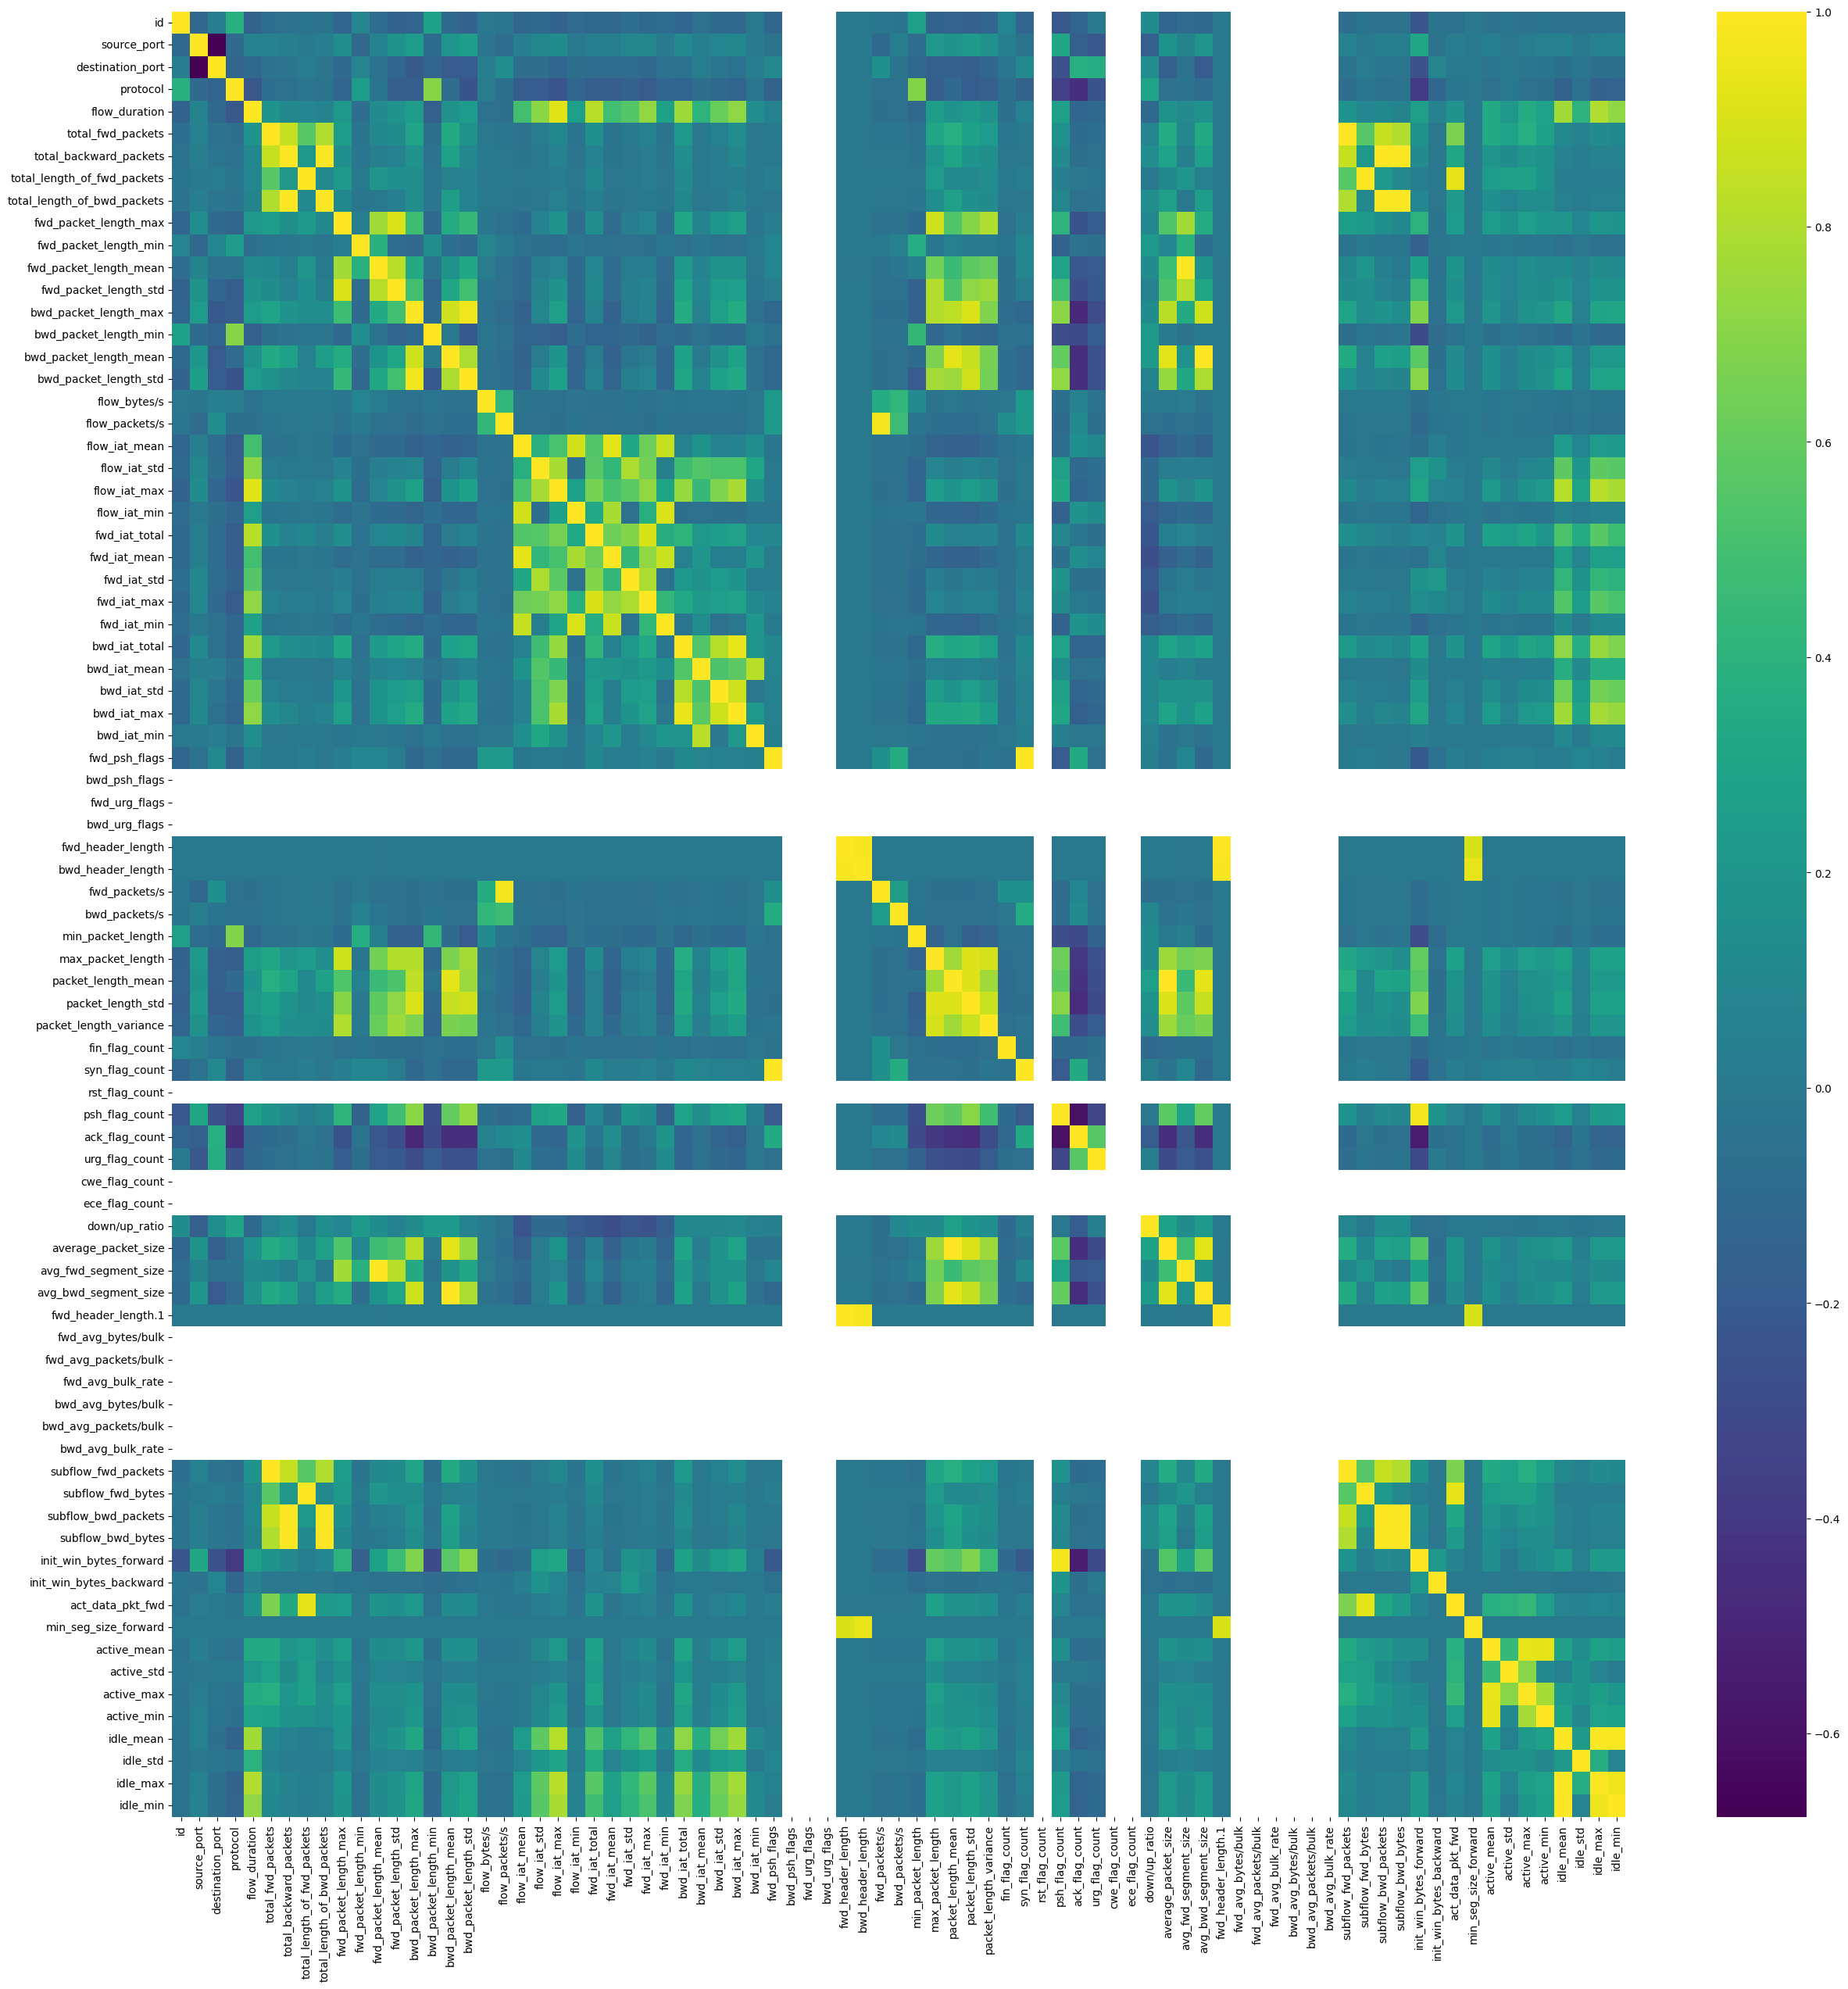

In [138]:
# plotting the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.plot()